In [2]:
import pandas as pd

# Replace with the path to your downloaded CSV file
file_path = '/Users/soniaranvir/Downloads/retail-sales.csv'

# Try reading the CSV with a different encoding
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Check the first few rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Check for missing values
missing_values = df.isnull().sum()

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Check for duplicate transactions
duplicates = df.duplicated().sum()

# Output the results
missing_values, duplicates

(InvoiceNo           0
 StockCode           0
 Description      1454
 Quantity            0
 InvoiceDate         0
 UnitPrice           0
 CustomerID     135080
 Country             0
 dtype: int64,
 np.int64(5268))

In [4]:
# Handle missing values
df['Description'].fillna('Unknown', inplace=True)  # Replace missing descriptions with 'Unknown'
df.dropna(subset=['CustomerID'], inplace=True)  # Drop rows where 'CustomerID' is missing

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Check again for missing values and duplicates
missing_values_after = df.isnull().sum()
duplicates_after = df.duplicated().sum()

missing_values_after, duplicates_after

/var/folders/vb/q_v6yhs5009g17n65x83z5k00000gn/T/ipykernel_13393/3711694330.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('Unknown', inplace=True)  # Replace missing descriptions with 'Unknown'


(InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 CustomerID     0
 Country        0
 dtype: int64,
 np.int64(0))

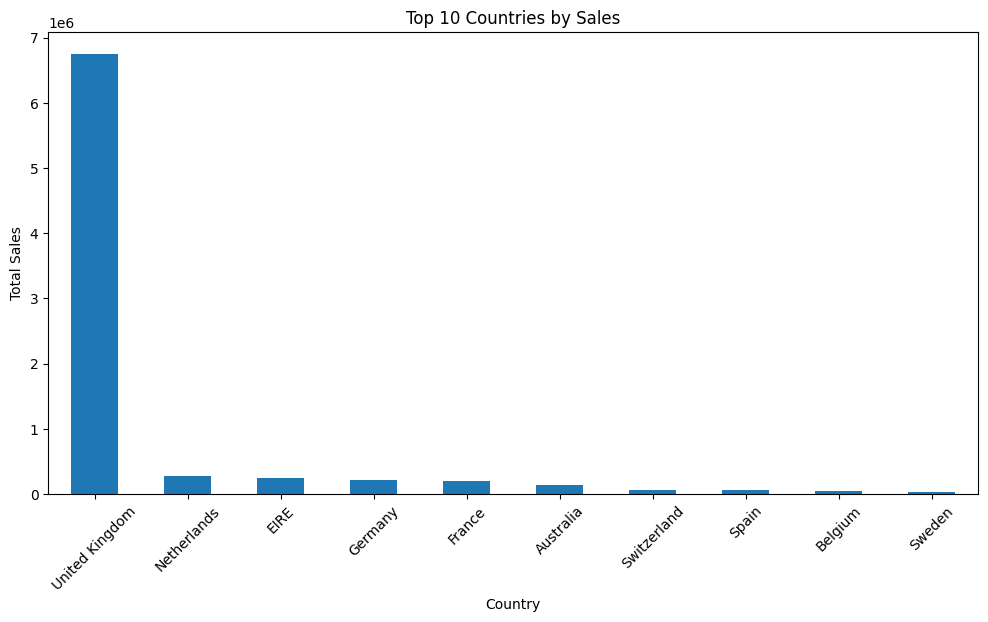

In [6]:
import matplotlib.pyplot as plt

# Display top 10 countries by sales
sales_by_country.head(10).plot(kind='bar', figsize=(12, 6), title='Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

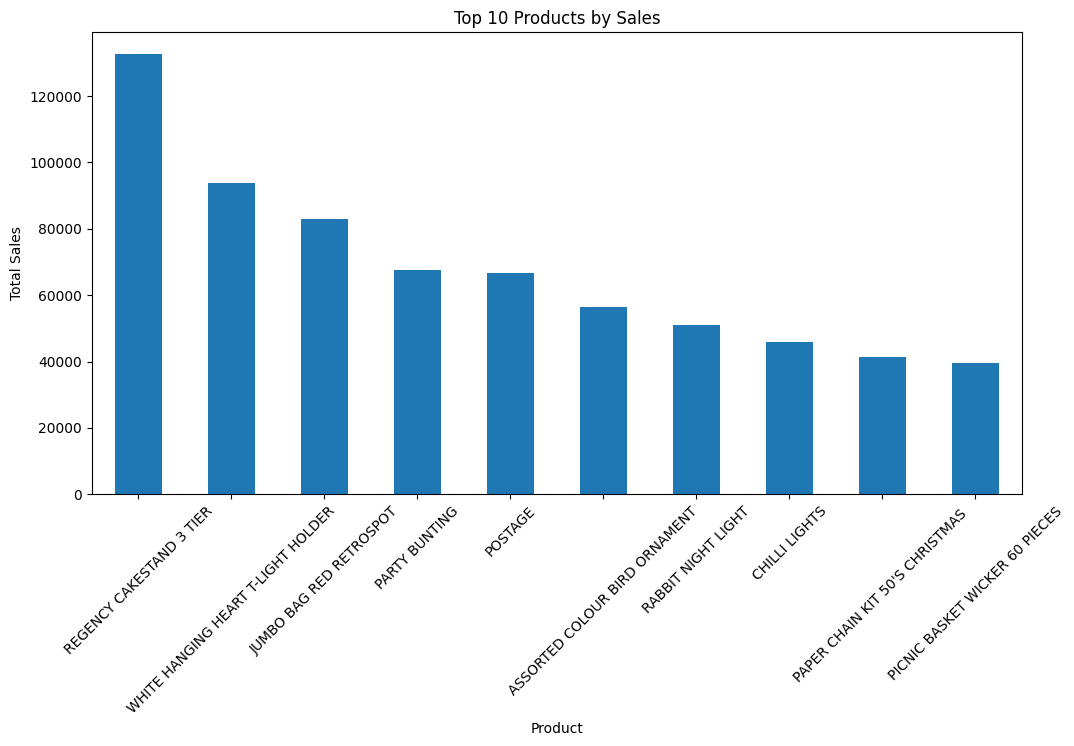

In [7]:
# Adding a new 'Sales' column (Total Sales = Quantity * UnitPrice)
df['Sales'] = df['Quantity'] * df['UnitPrice']

# Group by product description and sum the sales
sales_by_product = df.groupby('Description')['Sales'].sum().sort_values(ascending=False)

# Display the top 10 products by sales
sales_by_product.head(10).plot(kind='bar', figsize=(12, 6), title='Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

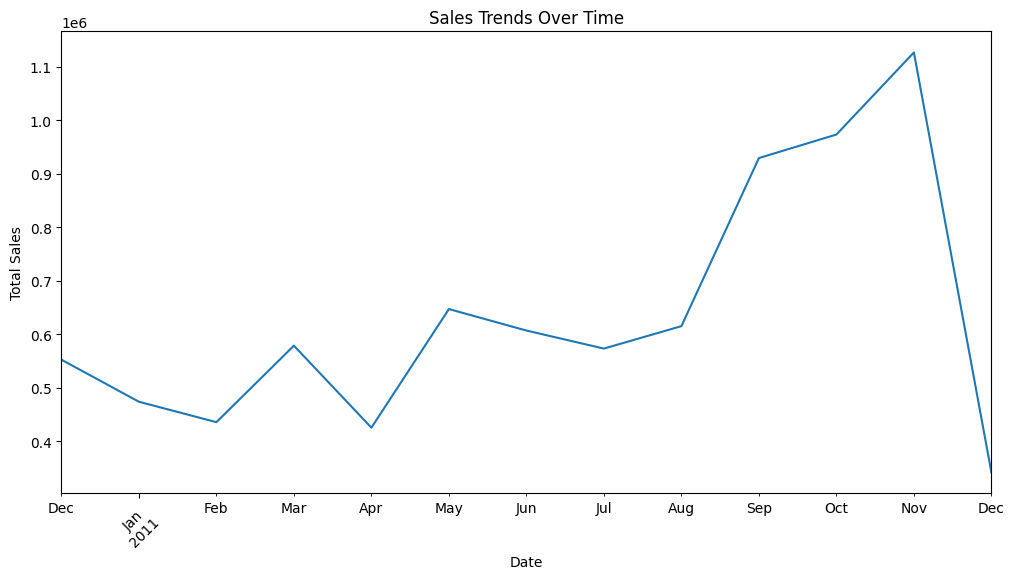

In [8]:
# Convert 'InvoiceDate' to datetime if it's not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Extract Year and Month from 'InvoiceDate'
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by Year-Month and calculate total sales
sales_by_month = df.groupby('YearMonth')['Sales'].sum()

# Plot the sales trends over time
sales_by_month.plot(figsize=(12, 6), title='Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

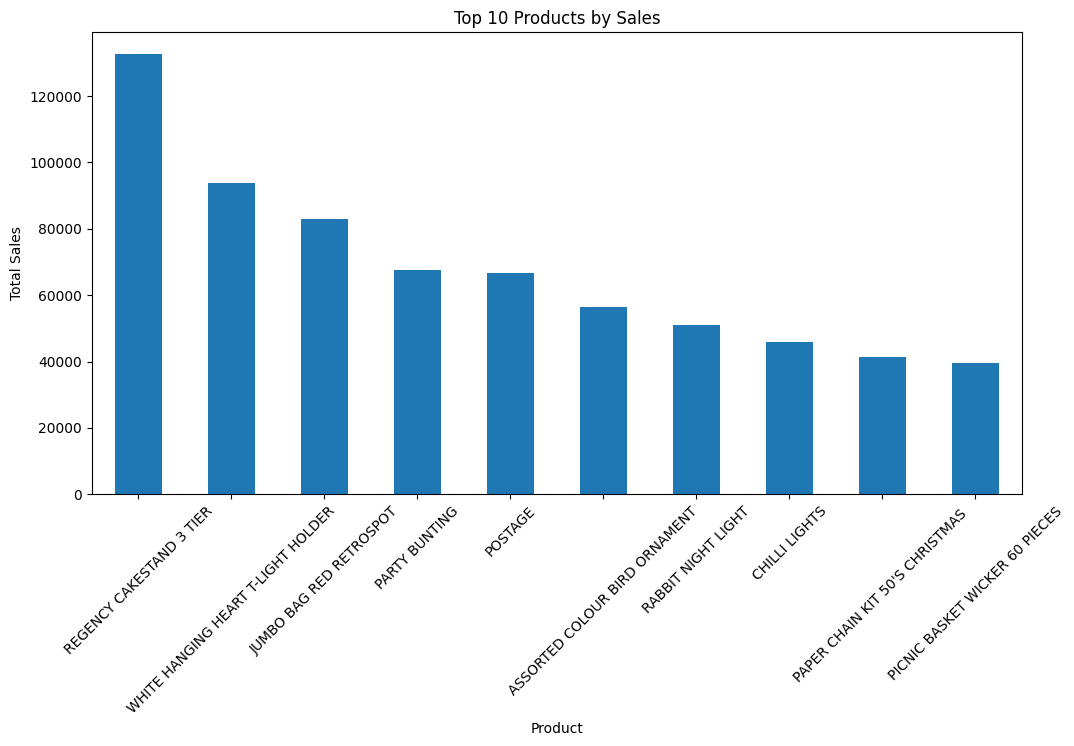

In [9]:
# Create a new column for sales per item
df['Sales'] = df['Quantity'] * df['UnitPrice']

# Group by product description and sum the sales
sales_by_product = df.groupby('Description')['Sales'].sum()

# Get the top 10 products by sales
top_sales_by_product = sales_by_product.nlargest(10)

# Plot the sales by product
top_sales_by_product.plot(kind='bar', figsize=(12, 6), title='Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

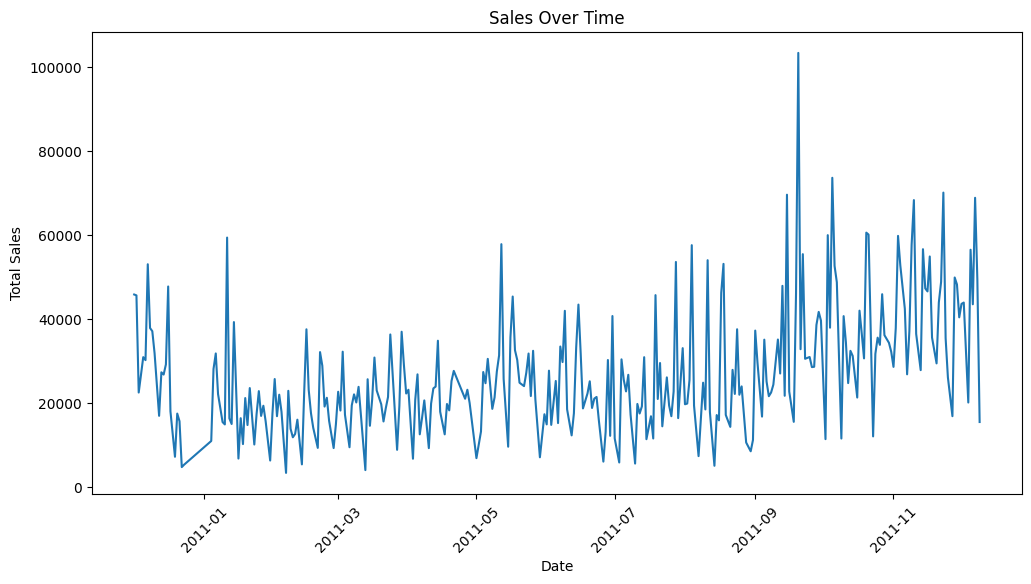

In [10]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Group by date and sum the sales
sales_by_date = df.groupby(df['InvoiceDate'].dt.date)['Sales'].sum()

# Plot the sales over time
sales_by_date.plot(kind='line', figsize=(12, 6), title='Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

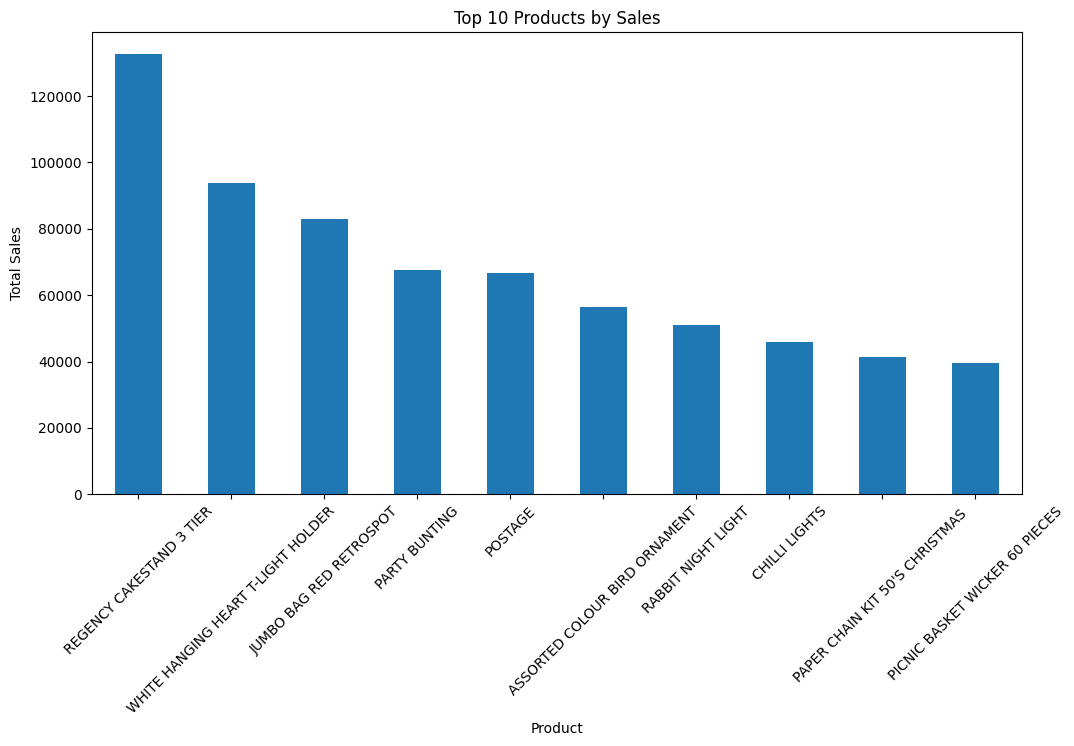

In [11]:
# Group by product description and sum the sales
sales_by_product = df.groupby('Description')['Sales'].sum()

# Sort values to get the top selling products
sales_by_product = sales_by_product.sort_values(ascending=False).head(10)

# Plot the sales by product
sales_by_product.plot(kind='bar', figsize=(12, 6), title='Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

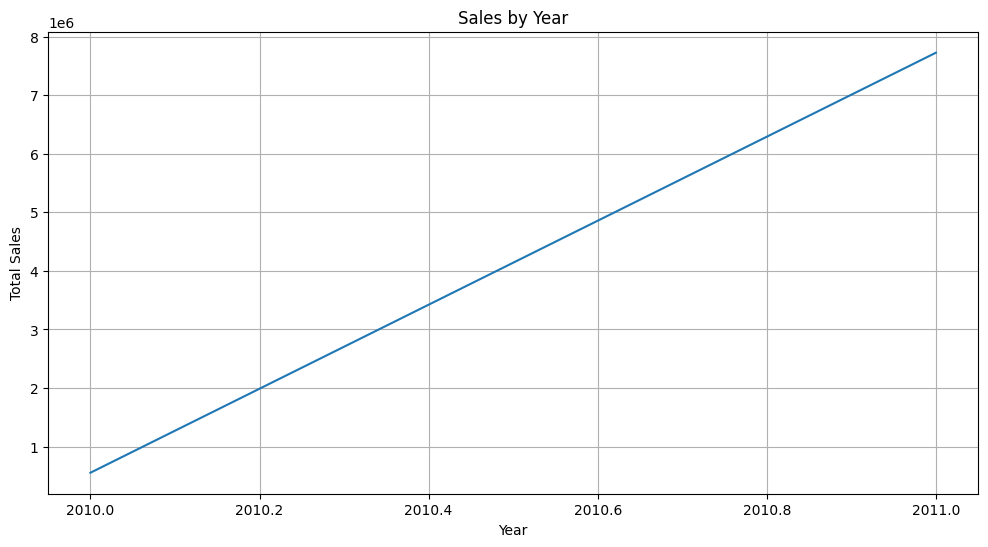

In [12]:
# Convert the InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract year from the InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year

# Group by year and sum the sales
sales_by_year = df.groupby('Year')['Sales'].sum()

# Plot the sales by year
sales_by_year.plot(kind='line', figsize=(12, 6), title='Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

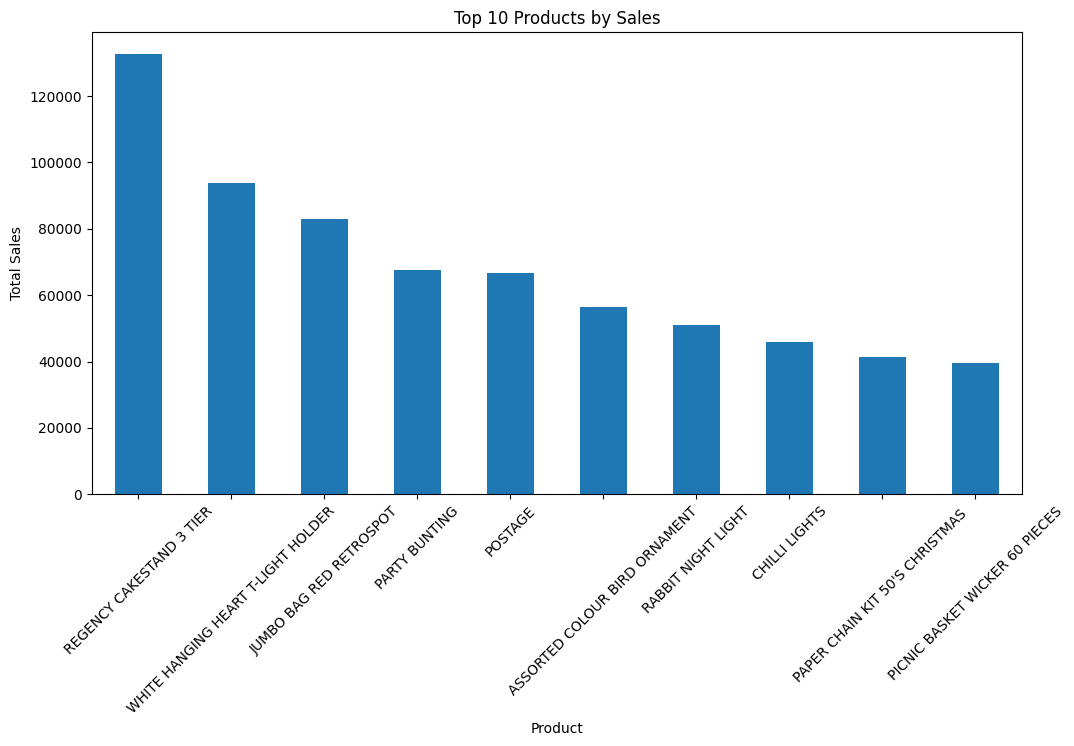

In [13]:
# Group by product description and sum the sales
sales_by_product = df.groupby('Description')['Sales'].sum()

# Sort the sales by highest
sales_by_product = sales_by_product.sort_values(ascending=False).head(10)

# Plot the top 10 selling products
sales_by_product.plot(kind='bar', figsize=(12, 6), title='Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

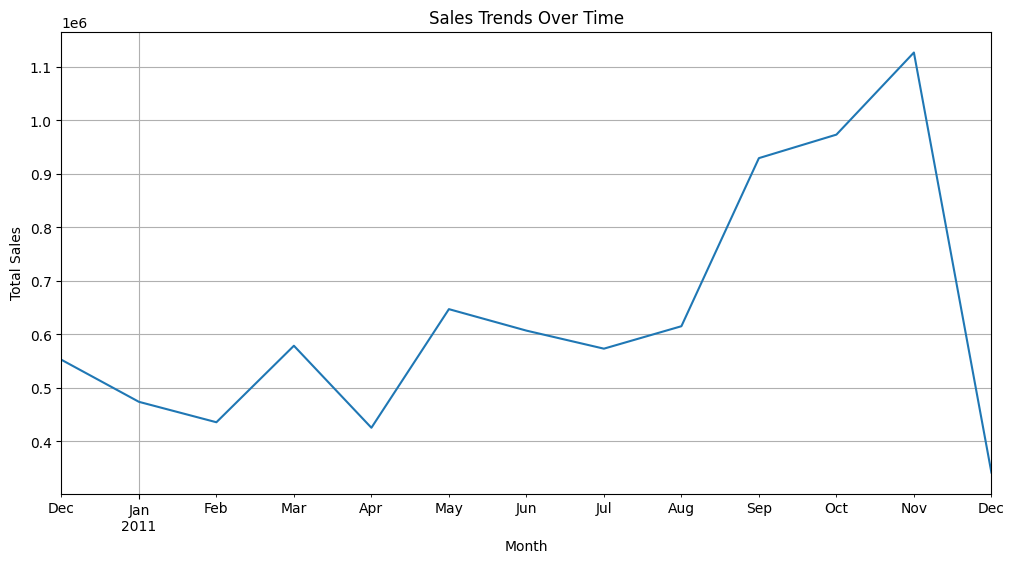

In [14]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract year-month for monthly sales analysis
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by YearMonth and calculate total sales for each month
sales_trends = df.groupby('YearMonth')['Sales'].sum()

# Plot the sales trends over time
sales_trends.plot(kind='line', figsize=(12, 6), title='Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

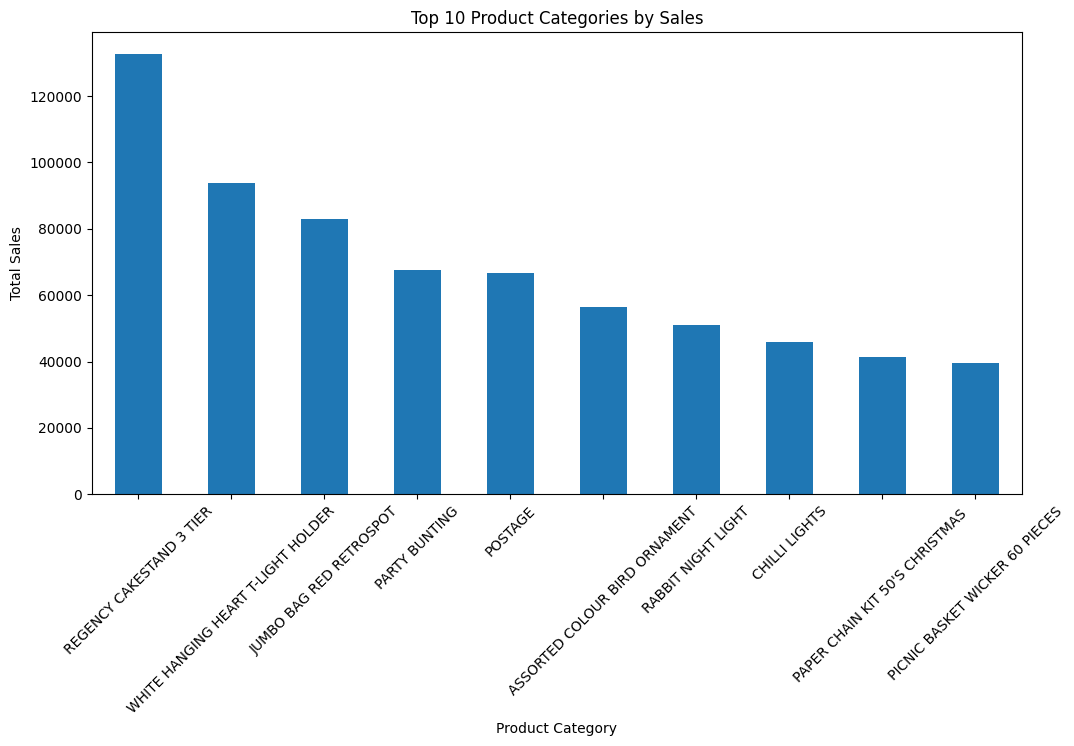

In [15]:
# Group by Description (Product Category) and calculate total sales for each
sales_by_product = df.groupby('Description')['Sales'].sum().sort_values(ascending=False)

# Display the top 10 product categories by sales
sales_by_product.head(10).plot(kind='bar', figsize=(12, 6), title='Top 10 Product Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

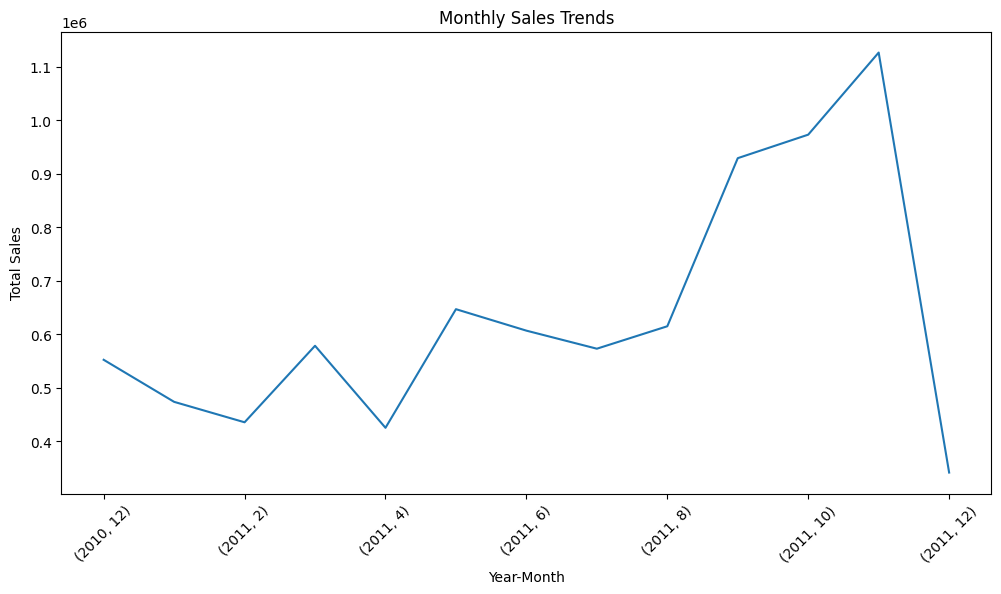

In [16]:
# Extract Month and Year from the InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Group by Year and Month and calculate total sales
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum()

# Plot the trend of monthly sales
monthly_sales.plot(kind='line', figsize=(12, 6), title='Monthly Sales Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

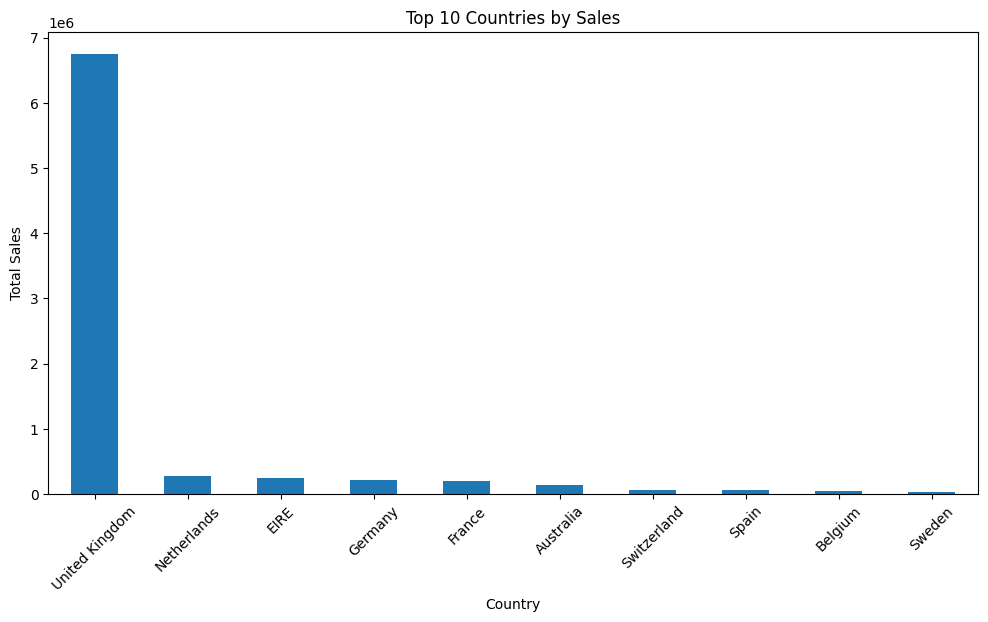

In [18]:
# Example of adding charts to the report
import matplotlib.pyplot as plt

# Top 10 countries by sales
sales_by_country.head(10).plot(kind='bar', figsize=(12, 6), title='Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

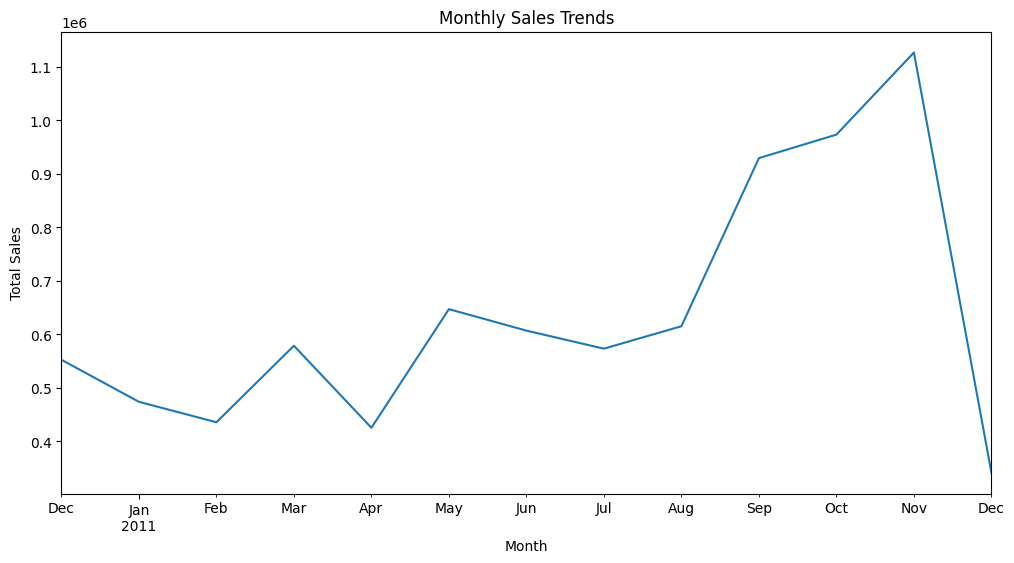

In [19]:
# Seasonal sales trends
sales_by_month.plot(kind='line', figsize=(12, 6), title='Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

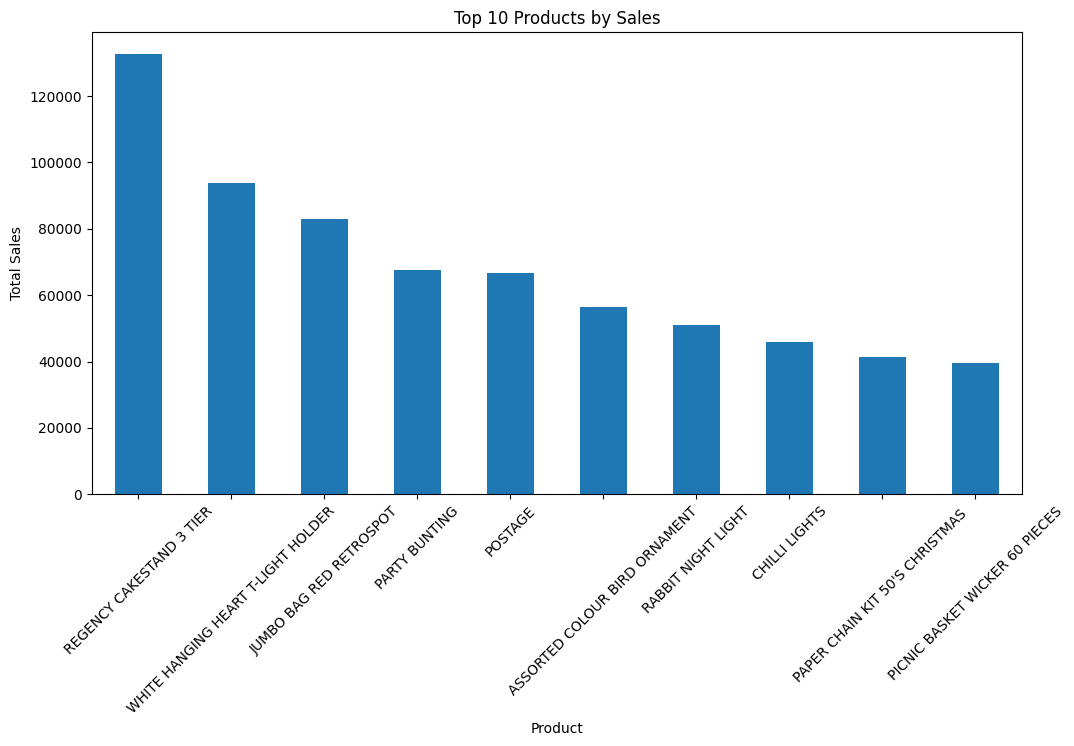

In [20]:
# Top 10 products by sales
sales_by_product.head(10).plot(kind='bar', figsize=(12, 6), title='Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()